In [1]:
from google.colab import files
uploaded = files.upload()

Saving ToyotaCorolla - MLR.csv to ToyotaCorolla - MLR.csv


In [3]:
import pandas as pd
df=pd.read_csv('ToyotaCorolla - MLR.csv')
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


The dataset consists of the following variables:

Age: Age in years

KM: Accumulated Kilometers on odometer

FuelType: Fuel Type (Petrol, Diesel, CNG)

HP: Horse Power

Automatic: Automatic ( (Yes=1, No=0)

CC: Cylinder Volume in cubic centimeters

Doors: Number of doors

Weight: Weight in Kilograms

Quarterly_Tax:

Price: Offer Price in EUROs

1.Perform exploratory data analysis (EDA) to gain insights into the dataset. Provide visualizations and summary statistics of the variables. Pre process the data to apply the MLR.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
print(df.describe())

              Price    Age_08_04             KM           HP    Automatic  \
count   1436.000000  1436.000000    1436.000000  1436.000000  1436.000000   
mean   10730.824513    55.947075   68533.259749   101.502089     0.055710   
std     3626.964585    18.599988   37506.448872    14.981080     0.229441   
min     4350.000000     1.000000       1.000000    69.000000     0.000000   
25%     8450.000000    44.000000   43000.000000    90.000000     0.000000   
50%     9900.000000    61.000000   63389.500000   110.000000     0.000000   
75%    11950.000000    70.000000   87020.750000   110.000000     0.000000   
max    32500.000000    80.000000  243000.000000   192.000000     1.000000   

                cc        Doors  Cylinders        Gears      Weight  
count   1436.00000  1436.000000     1436.0  1436.000000  1436.00000  
mean    1576.85585     4.033426        4.0     5.026462  1072.45961  
std      424.38677     0.952677        0.0     0.188510    52.64112  
min     1300.00000     2.0

In [6]:
# Check for missing values
print(df.isnull().sum())

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64


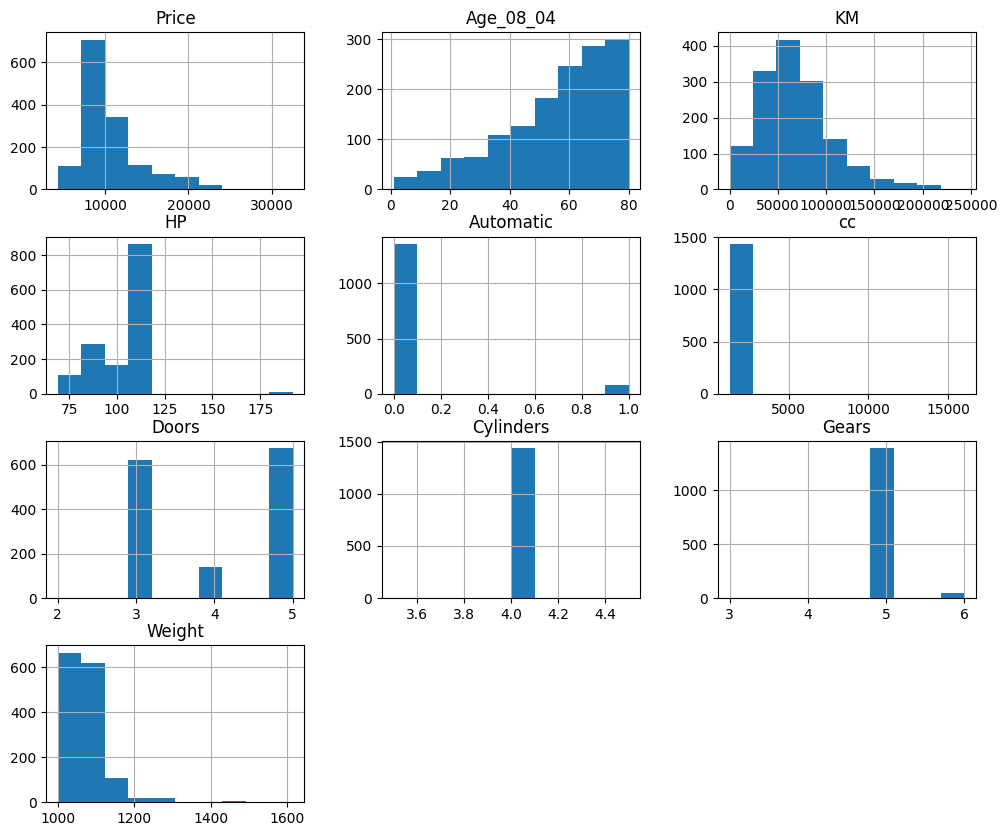

In [7]:
# Visualize the distribution of numerical variables
df.hist(figsize=(12, 10))
plt.show()

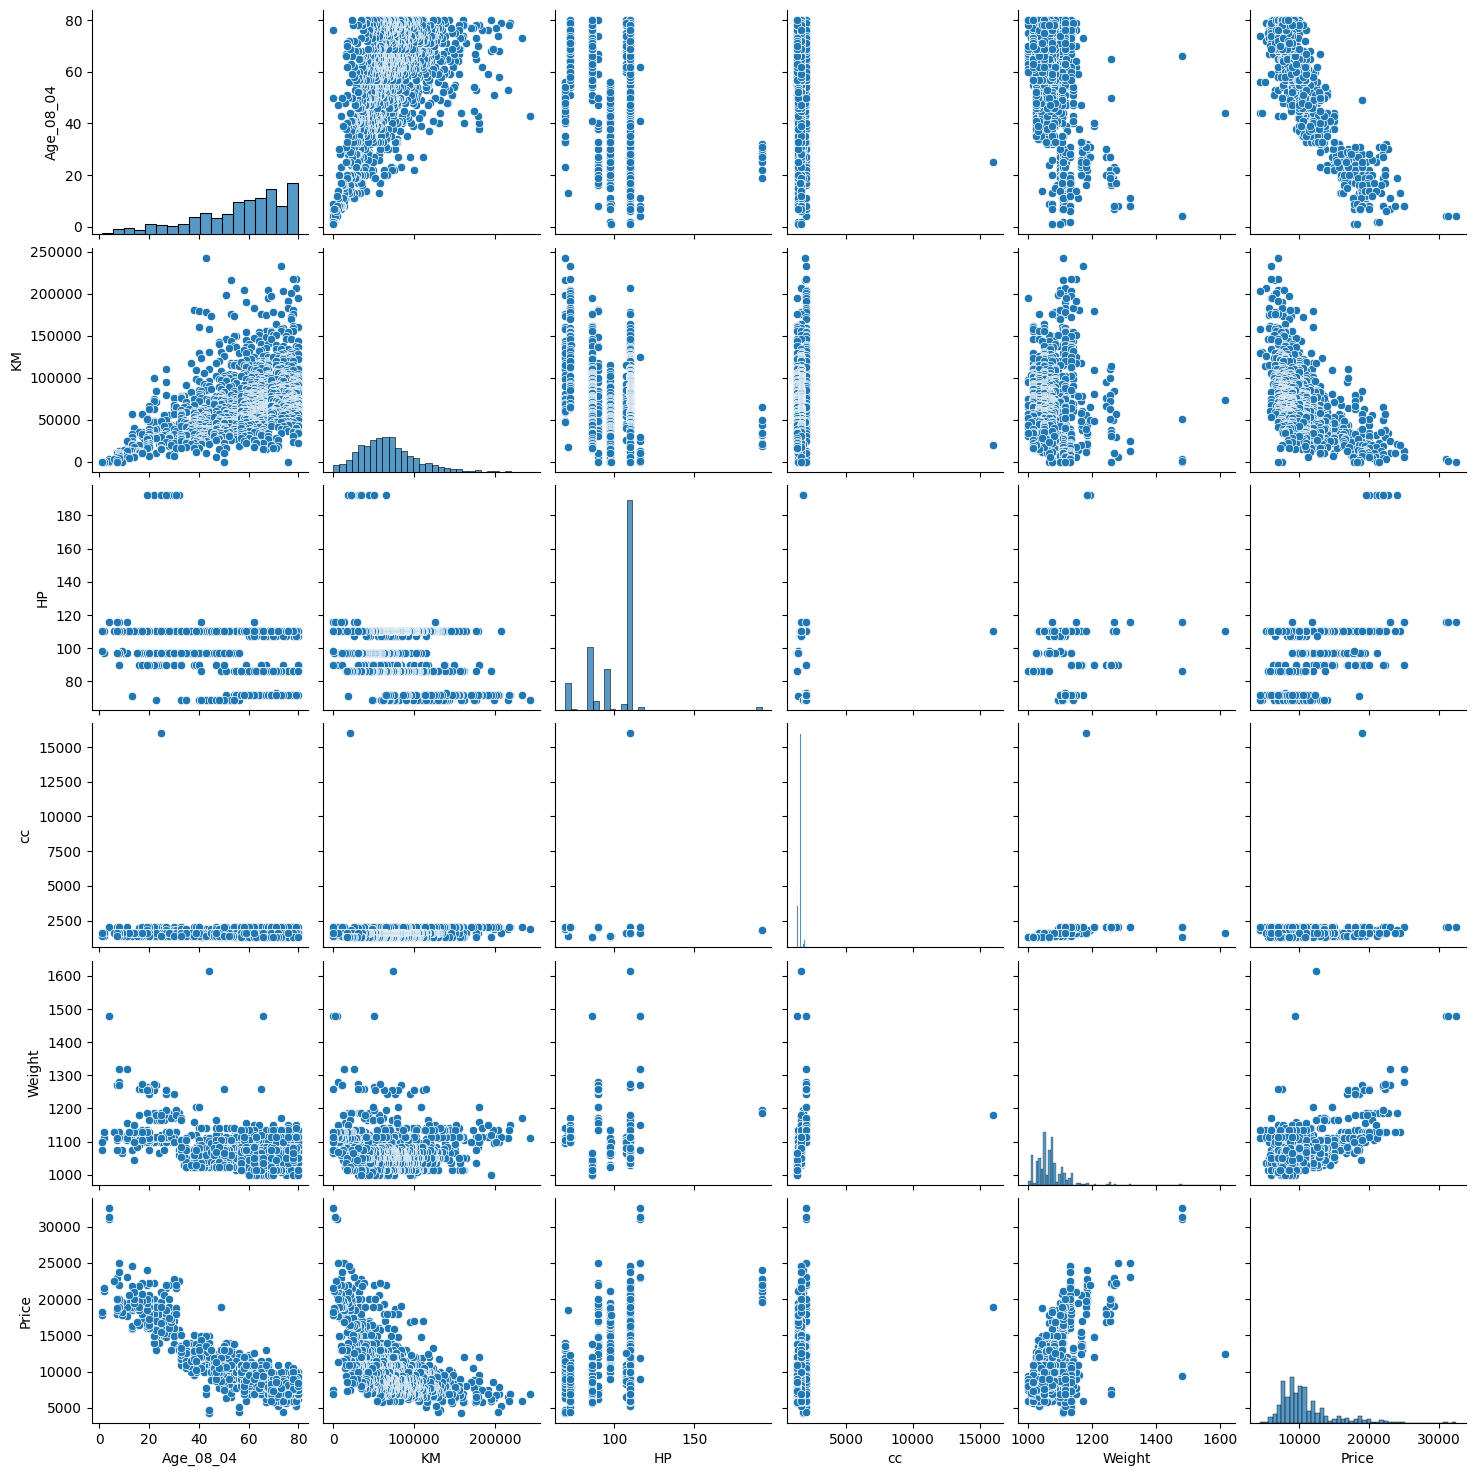

In [8]:
# Visualize the relationship between variables
sns.pairplot(df[['Age_08_04', 'KM', 'HP', 'cc', 'Weight', 'Price']])
plt.show()

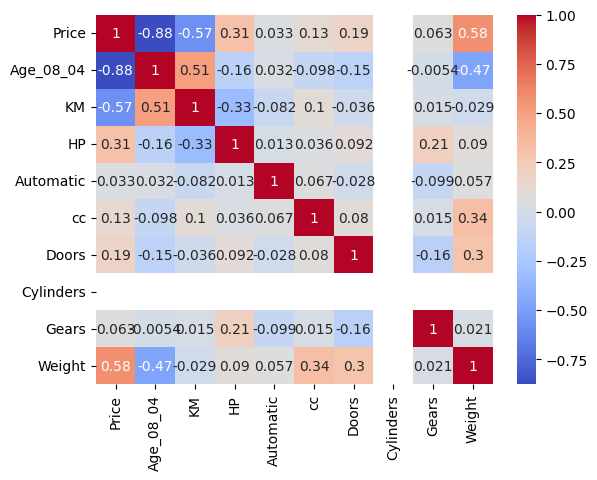

In [9]:
# Correlation matrix
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [10]:
df = pd.get_dummies(df, columns=['Fuel_Type'], drop_first=True)

2.Split the dataset into training and testing sets (e.g., 80% training, 20% testing).

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X = df.drop('Price', axis=1)
y = df['Price']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train
X_test
y_train
y_test

,Price
594,10800
754,9950
630,7500
1259,9250
903,9750
...,...
174,21950
1428,8450
297,12850
1435,6950


3.Build a multiple linear regression model using the training dataset. Interpret the coefficients of the model. Build minimum of 3 different models.

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder





*   Model 1





In [16]:
model1 = LinearRegression()
model1.fit(X_train, y_train)
X_test_copy = X_test.copy()
y_pred_model1 = model1.predict(X_test_copy)

mse_model1 = mean_squared_error(y_test, y_pred_model1)
r2_model1 = r2_score(y_test, y_pred_model1)

print("Model 1 - All Features")
print("Mean Squared Error:", mse_model1)
print("R-squared:", r2_model1)
print("Coefficients:", model1.coef_)
print("Intercept:", model1.intercept_)

Model 1 - All Features
Mean Squared Error: 1839093.413257317
R-squared: 0.8621657410005834
Coefficients: [-1.49463436e+02 -5.10794153e-02  1.83715617e+01  2.56803346e+02
 -5.09116901e-02 -4.42137752e+01 -8.52651283e-14  6.19779113e+02
  2.24674281e+01  1.65713765e+02  1.06923108e+03  5.68913626e-04]
Intercept: -9564.000270558048




*   Model 2



In [17]:
X_train_selected = X_train[['Age_08_04', 'KM', 'HP', 'cc', 'Weight']]
X_test_selected = X_test[['Age_08_04', 'KM', 'HP', 'cc', 'Weight']]

model2 = LinearRegression()
model2.fit(X_train_selected, y_train)

y_pred_model2 = model2.predict(X_test_selected)

mse_model2 = mean_squared_error(y_test, y_pred_model2)
r2_model2 = r2_score(y_test, y_pred_model2)

print("\nModel 2 - Selected Features")
print("Mean Squared Error:", mse_model2)
print("R-squared:", r2_model2)
print("Coefficients:", model2.coef_)
print("Intercept:", model2.intercept_)



Model 2 - Selected Features
Mean Squared Error: 1995964.8372853633
R-squared: 0.8504087218447196
Coefficients: [-1.19972882e+02 -2.01056597e-02  2.91949637e+01 -1.00760393e-01
  2.00843833e+01]
Intercept: -5510.157105059123




*  Model 3



In [18]:
X_train['Age_KM_interaction'] = X_train['Age_08_04'] * X_train['KM']
X_test['Age_KM_interaction'] = X_test['Age_08_04'] * X_test['KM']

model3 = LinearRegression()
model3.fit(X_train, y_train)
y_pred_model3 = model3.predict(X_test)

mse_model3 = mean_squared_error(y_test, y_pred_model3)
r2_model3 = r2_score(y_test, y_pred_model3)

print("\nModel 3 - Interaction Terms")
print("Mean Squared Error:", mse_model3)
print("R-squared:", r2_model3)
print("Coefficients:", model3.coef_)
print("Intercept:", model3.intercept_)


Model 3 - Interaction Terms
Mean Squared Error: 1839093.413257317
R-squared: 0.8621657410005834
Coefficients: [-1.49463436e+02 -5.10794153e-02  1.83715617e+01  2.56803346e+02
 -5.09116901e-02 -4.42137752e+01 -8.52651283e-14  6.19779113e+02
  2.24674281e+01  1.65713765e+02  1.06923108e+03  5.68913626e-04]
Intercept: -9564.000270558048


4.Evaluate the performance of the model using appropriate evaluation metrics on the testing dataset.

In [19]:

# Evaluate Model 1
print("\nModel 1 - All Features")
print("Mean Squared Error:", mse_model1)
print("R-squared:", r2_model1)

# Evaluate Model 2
print("\nModel 2 - Selected Features")
print("Mean Squared Error:", mse_model2)
print("R-squared:", r2_model2)

# Evaluate Model 3
print("\nModel 3 - Interaction Terms")
print("Mean Squared Error:", mse_model3)
print("R-squared:", r2_model3)




Model 1 - All Features
Mean Squared Error: 1839093.413257317
R-squared: 0.8621657410005834

Model 2 - Selected Features
Mean Squared Error: 1995964.8372853633
R-squared: 0.8504087218447196

Model 3 - Interaction Terms
Mean Squared Error: 1839093.413257317
R-squared: 0.8621657410005834


5.Apply Lasso and Ridge methods on the model.

In [20]:
from sklearn.linear_model import Lasso, Ridge

In [21]:
# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("\nLasso Regression")
print("Mean Squared Error:", mse_lasso)
print("R-squared:", r2_lasso)
print("Coefficients:", lasso.coef_)
print("Intercept:", lasso.intercept_)


Lasso Regression
Mean Squared Error: 1839769.9278278882
R-squared: 0.8621150383642383
Coefficients: [-1.49443779e+02 -5.10835249e-02  1.83242574e+01  2.53910987e+02
 -5.04528395e-02 -4.43401833e+01  0.00000000e+00  6.17579921e+02
  2.24823907e+01  1.48783391e+02  1.05571684e+03  5.68859712e-04]
Intercept: -9551.145188514325


In [22]:
# Ridge Regression
ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("\nRidge Regression")
print("Mean Squared Error:", mse_ridge)
print("R-squared:", r2_ridge)
print("Coefficients:", ridge.coef_)
print("Intercept:", ridge.intercept_)


Ridge Regression
Mean Squared Error: 1839011.0998849657
R-squared: 0.8621719101285907
Coefficients: [-1.49461095e+02 -5.10915648e-02  1.83695695e+01  2.56214262e+02
 -5.08353228e-02 -4.42387790e+01  0.00000000e+00  6.18644818e+02
  2.24659668e+01  1.58422046e+02  1.06156514e+03  5.68994093e-04]
Intercept: -9548.63586684367


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=1.0438e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Interview Questions:

1.What is Normalization & Standardization and how is it helpful?

2.What techniques can be used to address multicollinearity in multiple linear regression?

In [ ]:
# 1.What is Normalization & Standardization and how is it helpful?
# Normalization scales the data to a specific range, typically between 0 and 1.
# Standardization transforms data to have zero mean and unit variance.
# Both techniques are helpful for improving the performance of machine learning algorithms that are sensitive to the scale of the data, such as gradient descent-based methods.
# Normalization is useful when the data has a specific range or distribution, while standardization is more generally applicable.

# 2.What techniques can be used to address multicollinearity in multiple linear regression?
# Multicollinearity occurs when predictor variables in a regression model are highly correlated.
# Techniques to address multicollinearity include:
#   - Removing one or more of the correlated variables.
#   - Combining correlated variables into a single variable.
#   - Using regularization techniques like Ridge regression, which penalizes large coefficients and helps to reduce the impact of multicollinearity.
#   - Principal Component Analysis (PCA) to reduce the dimensionality of the data and create uncorrelated components.
